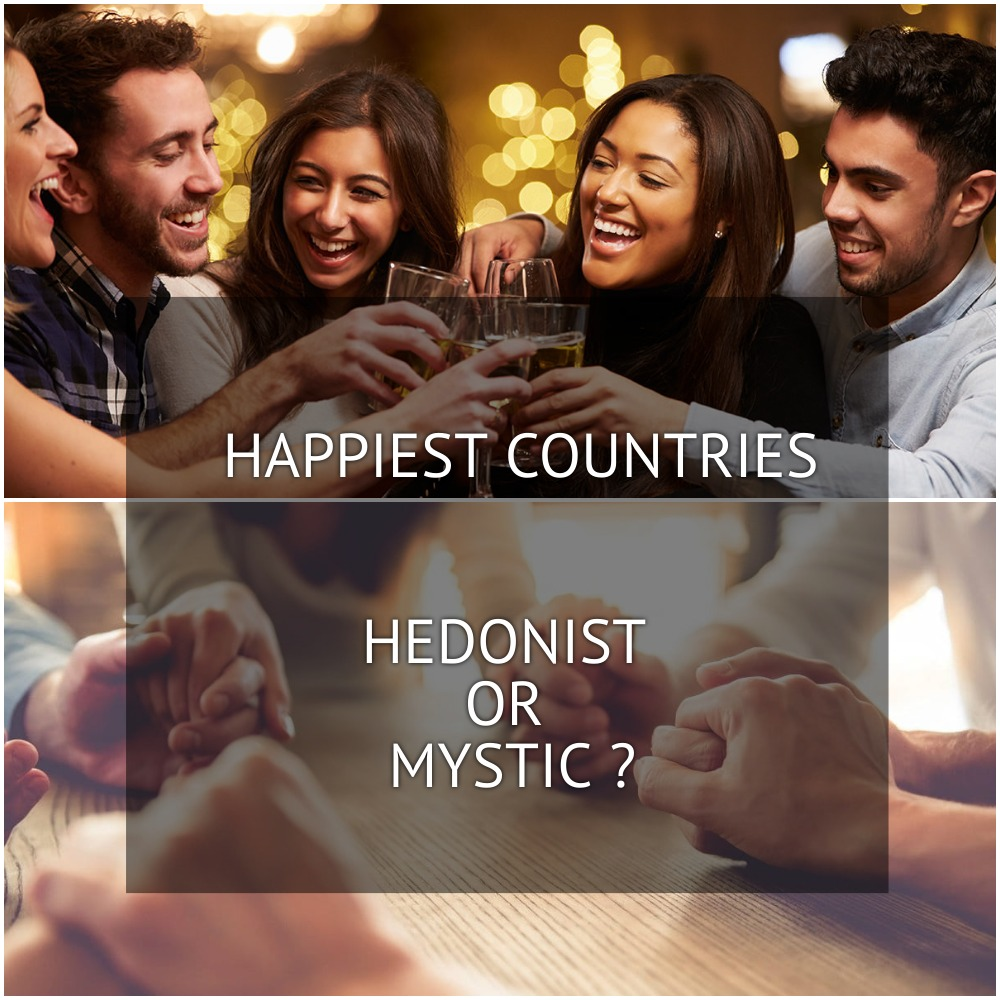

In [132]:
from IPython.display import Image
Image(filename='/home/aj/Desktop/AJviz/pjimage.jpg') 

In [133]:
import seaborn as sns
import pandas as pd
import plotly
import numpy as np
import matplotlib.pyplot as plt
from plotly import graph_objs as go, offline as offline
%matplotlib inline
offline.init_notebook_mode(connected=False)

In [134]:
df_allyear = pd.read_csv('/home/aj/Downloads/Happy-master/data/Original_2017_full.csv')

In [135]:
new_names = ['country', 'year', 'happiness', 'log_gdp_per_cap', 'social_support', 
             'life_expectancy', 'freedom', 'generosity', 'corruption_perception', 
             'positive_affect', 'negative_affect', 'confidence_in_government', 
             'democratic_quality', 'delivery_quality', 'happiness_sd', 
             'happiness_sd/mean', 'gini_index', 'gini_index 2000-15', 
             'household_income_gini']

In [136]:
## rename variables for better naming convention
df_allyear.columns = new_names

In [137]:
len(df_allyear['country'].unique())

164

In [138]:
df_region = pd.read_csv('/home/aj/Downloads/Happy-master/data/Original_2017_region.csv').rename(columns={'Region indicator': 'region'})

In [139]:
## merge with dataset that has region indicator
df_allyear = pd.merge(df_allyear, df_region, on='country')

In [140]:
layout = go.Layout(title="Happiness Trend (2006 - 2017)", font=dict(size=18), 
                   xaxis=dict(title='Year', titlefont=dict(size=18), 
                              tickfont=dict(size=14), showline=True),
                   yaxis=dict(range=[0, 8], title='Happiness', 
                              titlefont=dict(size=18), tickfont=dict(size=14), showline=True),legend=dict(font=dict(size=10)))
fig = {'data': [{'x': df_allyear[df_allyear['region'] == region].groupby('year')
                 .agg({'happiness': 'mean'}).reset_index()['year'],
                 'y': df_allyear[df_allyear['region'] == region].groupby('year')
                 .agg({'happiness': 'mean'}).reset_index()['happiness'],
                 'name': region, 'mode': 'lines', } for region in df_allyear['region'].unique()], 
       'layout': layout}
offline.iplot(fig)

In [141]:
df_2017 = df_allyear[df_allyear['year'] == 2017]

In [142]:
df_religion = pd.read_csv('/home/aj/Downloads/Happy-master/data/relig_iso.csv')

In [143]:
df_religion = df_religion[['iso', 'country', 'percentage_non_religious']]
df_religion['religion_pct'] = 100 - df_religion['percentage_non_religious']
df_religion = df_religion[['iso', 'country', 'religion_pct']].rename(columns={'iso': 'country_code'})

In [144]:
new_names = {'Bosnia Herzegovina': 'Bosnia and Herzegovina',
             'Republic of Congo': 'Congo (Brazzaville)',
             'Democratic Republic of the Congo': 'Congo (Kinshasa)',
             'Finland ': 'Finland',
             'Kyrgyz Republic': 'Kyrgyzstan',
             'Macedonia (FYR)': 'Macedonia',
             'Sudan': 'South Sudan',
             'Taiwan': 'Taiwan Province of China',
             'United States of America': 'United States'}

In [145]:
df_religion.replace({'country': new_names}, inplace=True)

In [146]:
## Merge the datasets, keep all rows in the df dataset
df_2017 = pd.merge(df_2017, df_religion, how='left', on='country')

In [147]:
df_heatmap = df_2017[['country', 'country_code', 'happiness']]

In [148]:
data = [dict(type='choropleth', locations=df_heatmap['country_code'], z=df_heatmap['happiness'],
             text=df_heatmap['country'],
             colorscale=[[0, "rgb(0, 153, 153)"], [0.25, "rgb(122, 255, 122)"],
                         [0.5, "rgb(220, 220, 220)"], [0.75, "rgb(255, 128, 128)"],
                         [1, "rgb(204, 0, 102)"]],
             autocolorscale=False, reversescale=True,
             marker=dict(line=dict(color='rgb(180, 180, 180)', width=0.5)),
             colorbar=dict(autotick=False, title='Happiness'),)]
layout = dict(title='Happiness by Country (2017)', font=dict(size=18),
              geo=dict(showframe=False, showcoastlines=False,
                       projection=dict(type='Mercator')))
fig = dict(data=data, layout=layout)
offline.iplot(fig, validate=False, filename='world-heatmap')

In [151]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [152]:
plotly.offline.iplot({
    "data": [go.Scatter(x=df_2017['religion_pct'], 
                        y=df_2017['happiness'], 
                        mode="markers", 
                        hovertext=df_2017.index,marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
             color = 'rgba(200, 128, 245, 0.75)'
        )
    )
                        )
            ],
    "layout": go.Layout(title="World",
                        xaxis=dict(title='Religion percentage'),
                        yaxis=dict(title='Happiness Score')
                       )
})

In [153]:
df_2017.sort_values(by=['happiness'], ascending=False).head()

country  year  happiness  log_gdp_per_cap  social_support  \
39       Finland  2017   7.788252        10.612338        0.963826   
32       Denmark  2017   7.593702        10.748989        0.952100   
97        Norway  2017   7.578745        11.081789        0.950128   
52       Iceland  2017   7.476214        10.760409        0.966753   
120  Switzerland  2017   7.473593        10.955548        0.949661   

     life_expectancy   freedom  generosity  corruption_perception  \
39         71.696960  0.962199   -0.012174               0.192413   
32         71.662498  0.955416    0.145387               0.181148   
97         71.086586  0.953017    0.210104               0.249711   
52         72.755981  0.938783    0.235479               0.726845   
120        73.173759  0.924997    0.167875               0.316183   

     positive_affect     ...       Social support, 2015-2017  \
39          0.787137     ...                        0.956149   
32          0.823667     ...                        0.955462   
97          0.849100     ...                        0.952147   
52          0.895255     ...                        0.977497   
120         0.773997     ...                        0.938523   

     Standard error, social support, 2015-2017  \
39                                    0.003921   
32                                    0.004486   
97                                    0.004899   
52                                    0.004214   
120                                   0.005689   

     Freedom to make life choices, 2015-2017  \
39                                  0.946694   
32                                  0.948895   
97                                  0.951561   
52                                  0.943219   
120                                 0.929152   

     Standard error, freedom to make life choices, 2015-2017  \
39                                            0.005143         
32                                            0.004695         
97                                            0.005052         
52                                            0.007094         
120                                           0.006759         

     Generosity, 2015-2017, without adjustment for GDP per person  \
39                                            0.421381              
32                                            0.579054              
97                                            0.625537              
52                                            0.684818              
120                                           0.549967              

     Standard error, generosity, 2015-2017  \
39                                0.010529   
32                                0.010585   
97                                0.010838   
52                                0.014125   
120                               0.012200   

     Perceptions of corruption, 2015-2017  \
39                               0.221270   
32                               0.193662   
97                               0.319610   
52                               0.691878   
120                              0.288248   

     Standard error, perceptions of corruption, 2015-2017  country_code  \
39                                            0.008508              FIN   
32                                            0.008053              DNK   
97                                            0.009513              NOR   
52                                            0.012740              ISL   
120                                           0.010439              CHE   

    religion_pct  
39         84.00  
32         93.10  
97         93.30  
52         89.96  
120        84.60  

[5 rows x 35 columns]

In [154]:
df_2017.shape

(141, 35)

In [155]:
df_50 = df_2017.head(50)

In [156]:
df_2017['region'].unique()

array(['South Asia', 'Central and Eastern Europe',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'Western Europe', 'Sub-Saharan Africa', 'Southeast Asia',
       'East Asia'], dtype=object)

In [157]:
plotly.offline.iplot({
    "data": [go.Scatter(x=df_50['religion_pct'], 
                        y=df_50['happiness'], 
                        mode="markers", 
                        hovertext=df_50.index,marker = dict(
        size = 10,
        color = 'rgba(152, 200, 100, .8)',
        line = dict(
            width = 2,
             color = 'rgba(200, 128, 245, 0.75)'
        )
    )
                        )
            ],
    "layout": go.Layout(title="World",
                        xaxis=dict(title='Religion percentage'),
                        yaxis=dict(title='Happiness Score')
                       )
})

Text(0.5,0,'')

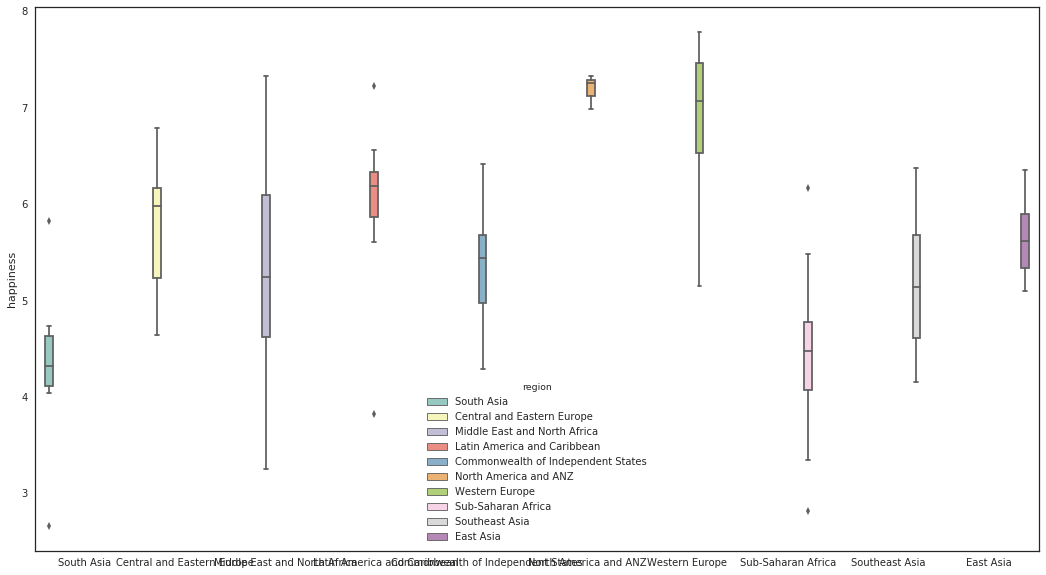

In [158]:
df=df_2017[['happiness','region','religion_pct']]
import seaborn as sns
fig, ax = plt.subplots(figsize = (18, 10))
sns.boxplot(x='region',y='happiness',data=df,hue="region",palette="Set3")
ax.set_xlabel('')

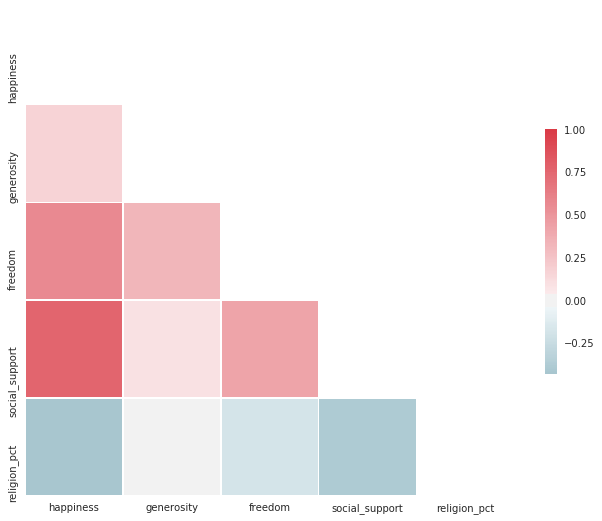

In [159]:
data= df_2017[['happiness','generosity','freedom','social_support','religion_pct']]
sns.set(style="white")
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [160]:
df1 = pd.read_csv('/home/aj/Downloads/happiness-and-alcohol-consumption/HappinessAlcoholConsumption.csv', delimiter=',')

In [161]:
df1.dataframeName = 'HappinessAlcoholConsumption.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 122 rows and 9 columns


In [162]:
df1.head()

Country          Region Hemisphere  HappinessScore  HDI  GDP_PerCapita  \
0      Denmark  Western Europe      north           7.526  928         53.579   
1  Switzerland  Western Europe      north           7.509  943         79.866   
2      Iceland  Western Europe      north           7.501  933         60.530   
3       Norway  Western Europe      north           7.498  951         70.890   
4      Finland  Western Europe      north           7.413  918         43.433   

   Beer_PerCapita  Spirit_PerCapita  Wine_PerCapita  
0             224                81             278  
1             185               100             280  
2             233                61              78  
3             169                71             129  
4             263               133              97

In [163]:
df1=df1[['Country','Region','HappinessScore','GDP_PerCapita','Beer_PerCapita','Spirit_PerCapita','Wine_PerCapita']]

In [164]:
df1['AlcoholC'] = df1['Beer_PerCapita']+df1['Spirit_PerCapita']+df1['Wine_PerCapita']

In [165]:
df1.head()

Country          Region  HappinessScore  GDP_PerCapita  Beer_PerCapita  \
0      Denmark  Western Europe           7.526         53.579             224   
1  Switzerland  Western Europe           7.509         79.866             185   
2      Iceland  Western Europe           7.501         60.530             233   
3       Norway  Western Europe           7.498         70.890             169   
4      Finland  Western Europe           7.413         43.433             263   

   Spirit_PerCapita  Wine_PerCapita  AlcoholC  
0                81             278       583  
1               100             280       565  
2                61              78       372  
3                71             129       369  
4               133              97       493

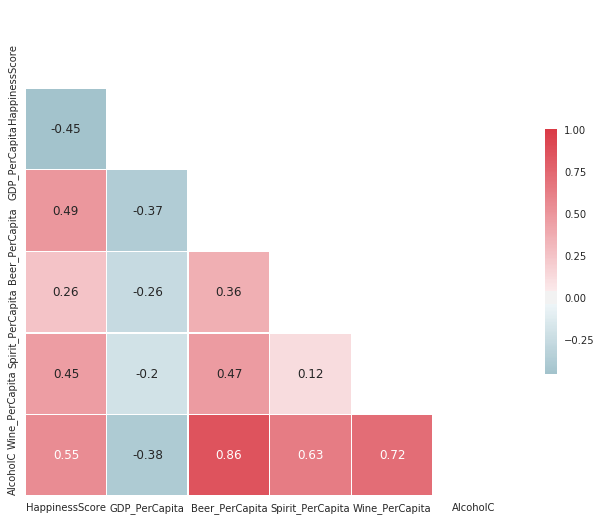

In [166]:
corr = df1.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

Text(0.5,0,'')

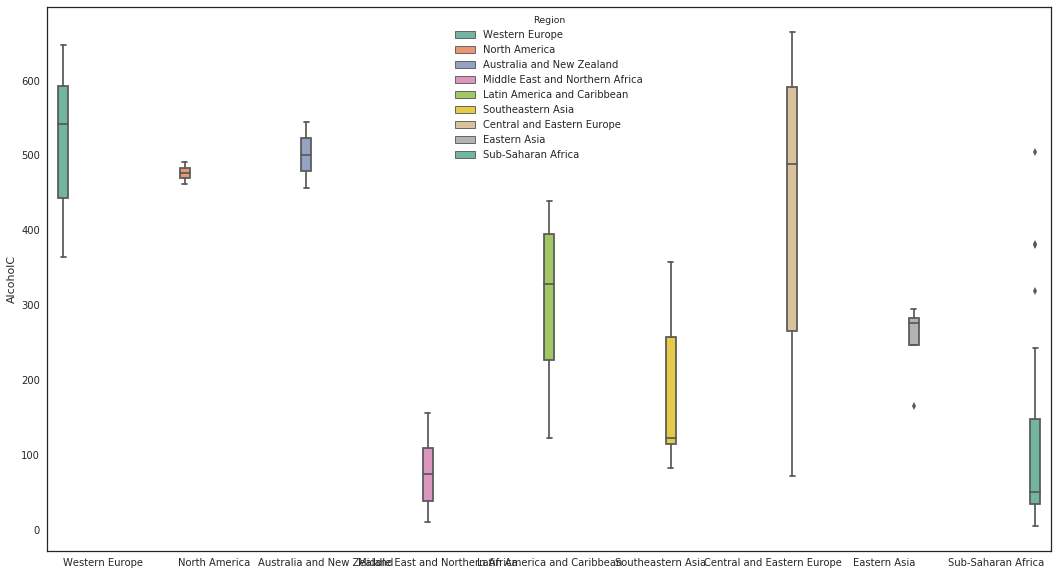

In [167]:
fig, ax = plt.subplots(figsize = (18, 10))
sns.boxplot(x='Region',y='AlcoholC',data=df1,hue="Region",palette="Set2")
ax.set_xlabel('')

In [168]:
plotly.offline.iplot({
    "data": [go.Scatter(x=df1['AlcoholC'], 
                        y=df1['HappinessScore'], 
                        mode="markers", 
                        hovertext=df_2017.index,marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
             color = 'rgba(200, 128, 245, 0.75)'
        )
    )
                        )
            ],
    "layout": go.Layout(title="World",
                        xaxis=dict(title='Alcohol Consumption perCap'),
                        yaxis=dict(title='Happiness Score')
                       )
})

AttributeError: module 'seaborn' has no attribute 'plt'

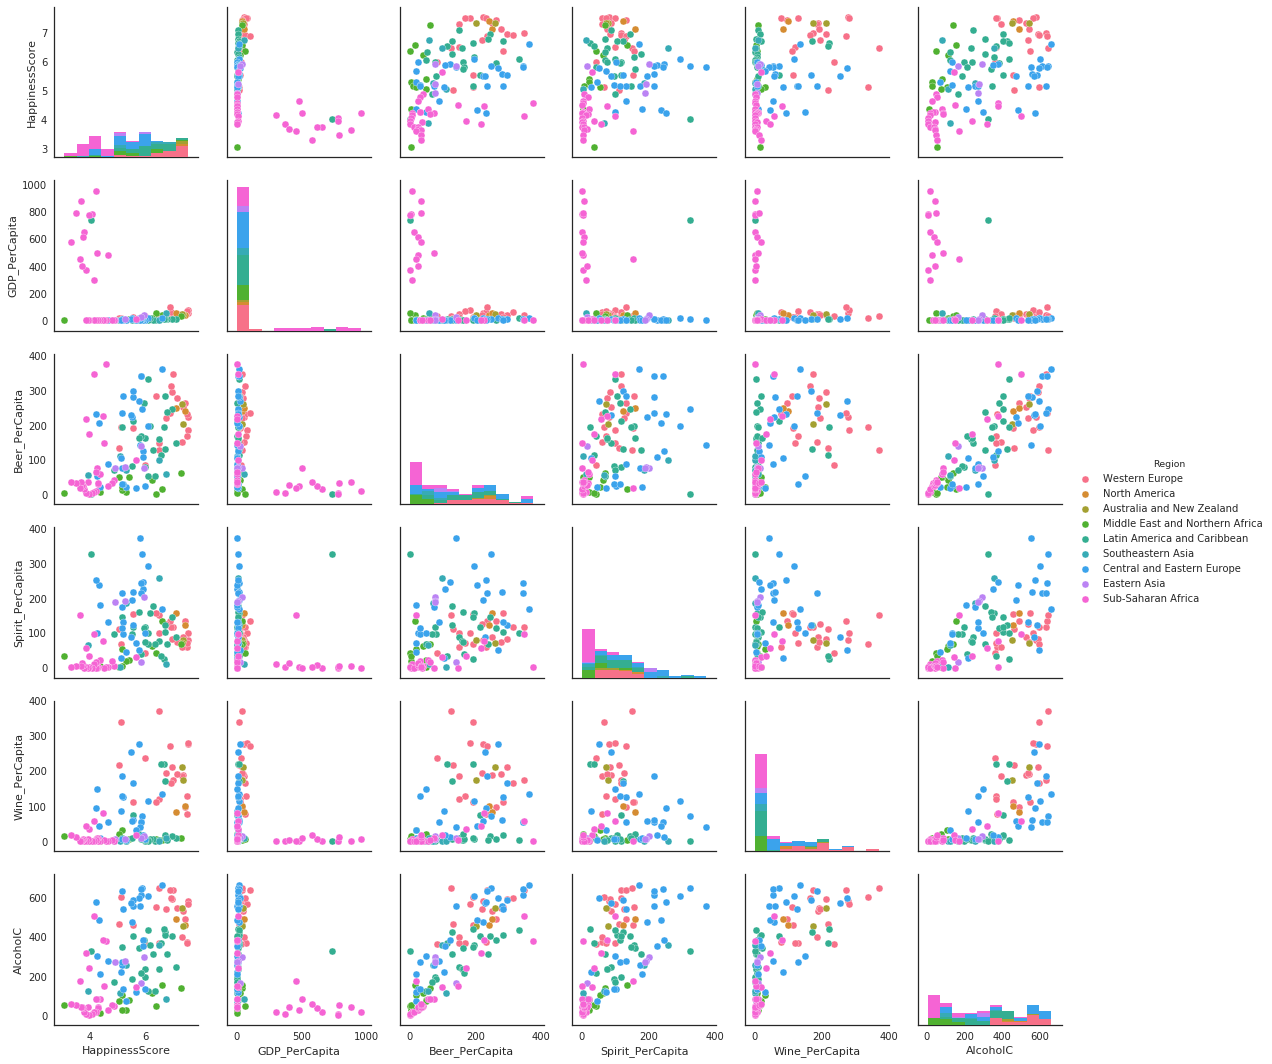

In [169]:
# Import library and dataset
import seaborn as sns
import matplotlib.pyplot as plt
# Method 1: on the same Axis
# Basic correlogram
sns.pairplot(df1,hue="Region", palette="husl")
sns.plt.show()